<a href="https://colab.research.google.com/github/VijayRameshkumar/AI_Curriculum/blob/master/multivariate_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Input, Concatenate
from keras.optimizers import Adam
import random
from collections import deque
from keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

! pip  install uvicorn keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [4]:
# Read data from CSV file
data = pd.read_excel('/content/train_v21.xlsx', engine='openpyxl')

# Extract the features from the DataFrame
features = ['Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']

# Extract the date column (assuming the date column name is 'Date')
dates = pd.to_datetime(data['date'])

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Read data from CSV file
data = pd.read_excel('/content/train_v21.xlsx', engine='openpyxl')

# Extract the features from the DataFrame
features = ['Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']

# Extract the date column (assuming the date column name is 'Date')
dates = pd.to_datetime(data['date'])

# Normalize the data using Min-Max scaling
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data[features])

# Define the number of time steps for input sequences
n_steps = 10

# Split the data into input sequences and corresponding targets
X, y = [], []
for i in range(len(scaled_data) - n_steps):
    X.append(scaled_data[i:i+n_steps])
    y.append(scaled_data[i+n_steps])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, len(features))))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the scaled predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Calculate the root mean squared error (RMSE)
# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Generate forecasts for the next 6 months
last_sequence = scaled_data[-n_steps:]
forecasts = []
for _ in range(12):
    next_sequence = model.predict(np.expand_dims(last_sequence, axis=0))
    forecasts.append(next_sequence[0])
    last_sequence = np.concatenate((last_sequence[1:], next_sequence), axis=0)

# Inverse transform the forecasts
forecasts = scaler.inverse_transform(forecasts)

# Create the forecast dates
last_date = dates.iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=12, freq='M')

# Create a DataFrame with the forecasts
forecast_data = pd.DataFrame(forecasts, columns=features)
forecast_data['Date'] = forecast_dates
forecast_data = forecast_data[['Date'] + features]

forecast_data.to_csv('forecasted_df.csv', index=False)

print(forecast_data)

# Save the model weights
model.save_weights('model_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

# Save the scaler
np.save('scaler.npy', scaler)


Epoch 1/50
2/2 [==============================] - 4s 14ms/step - loss: 689845.9375
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 631081.7500
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 597604.1875
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 526822.8125
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 515646.8125
Epoch 6/50
2/2 [==============================] - 0s 11ms/step - loss: 501787.9062
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 499780.4688
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 489973.0000
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: 472285.7188
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: 472659.5312
Epoch 11/50
2/2 [==============================] - 0s 12ms/step - loss: 471443.5000
Epoch 12/50
2/2 [==============================] - 0s 12ms/step - loss: 464293.3750
E

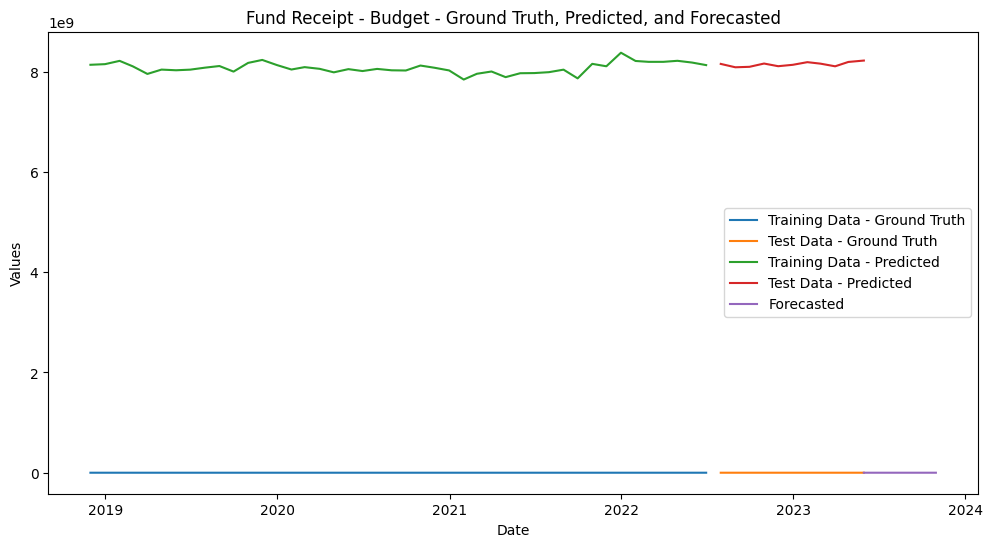

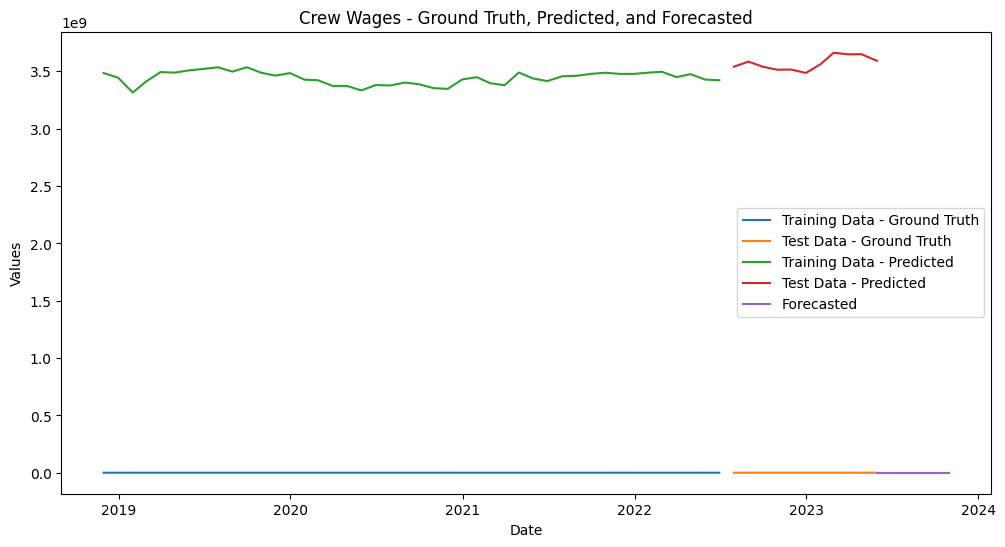

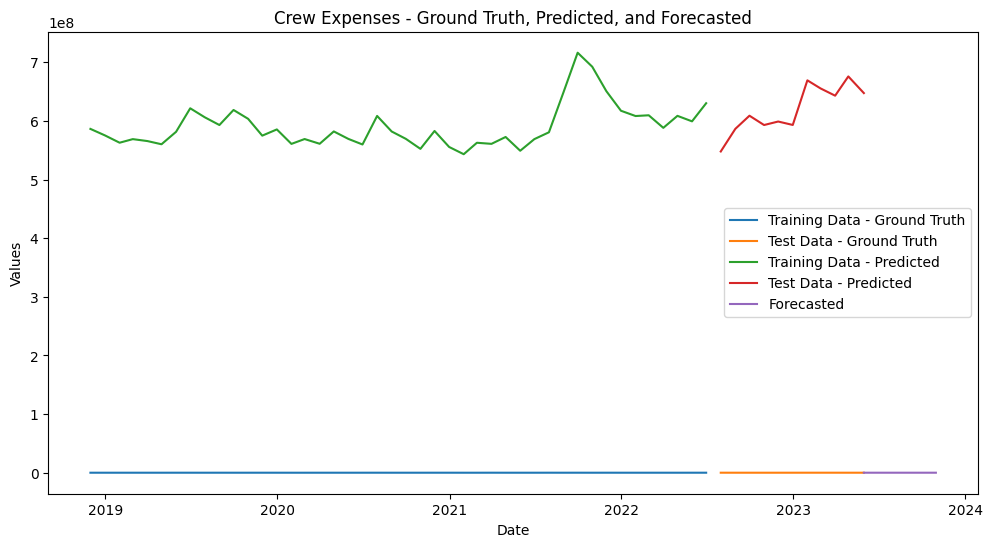

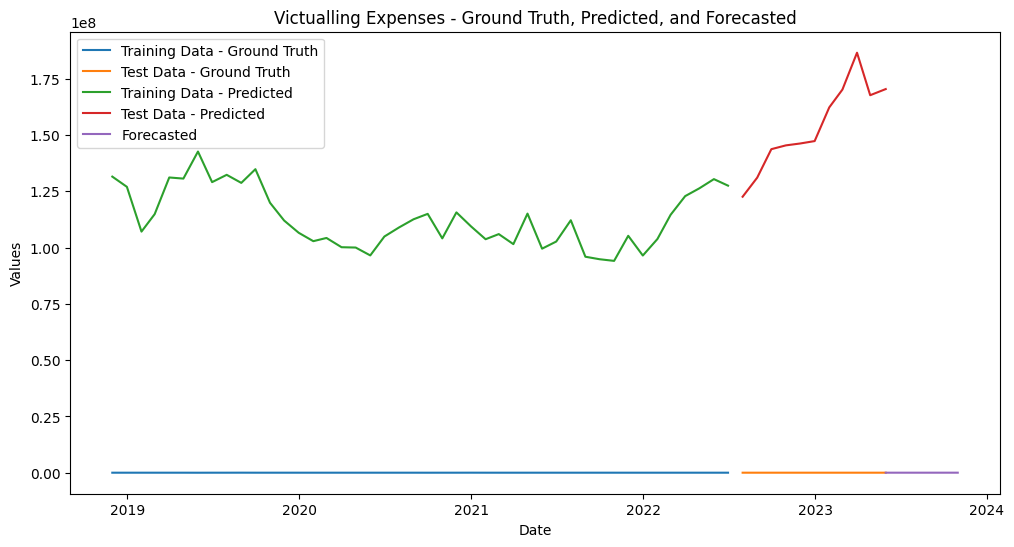

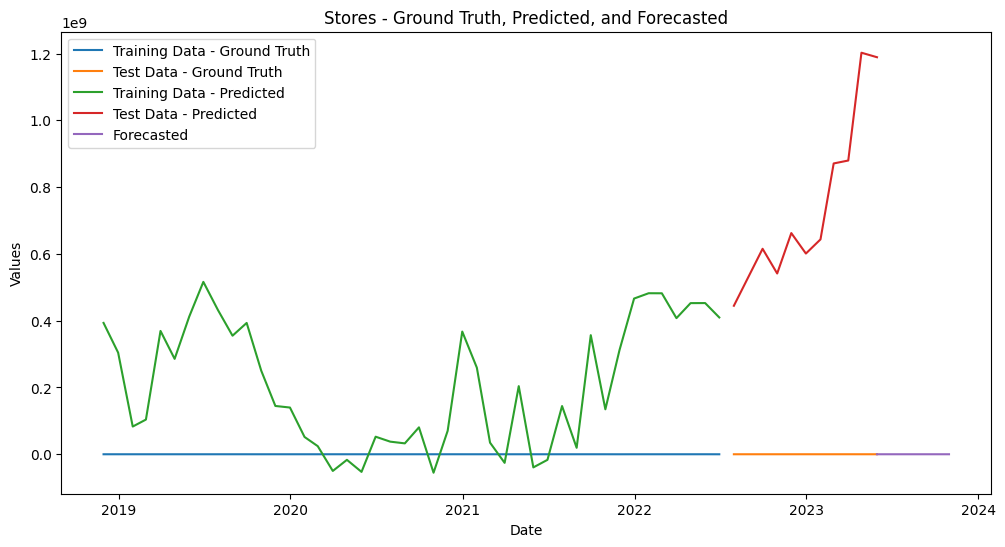

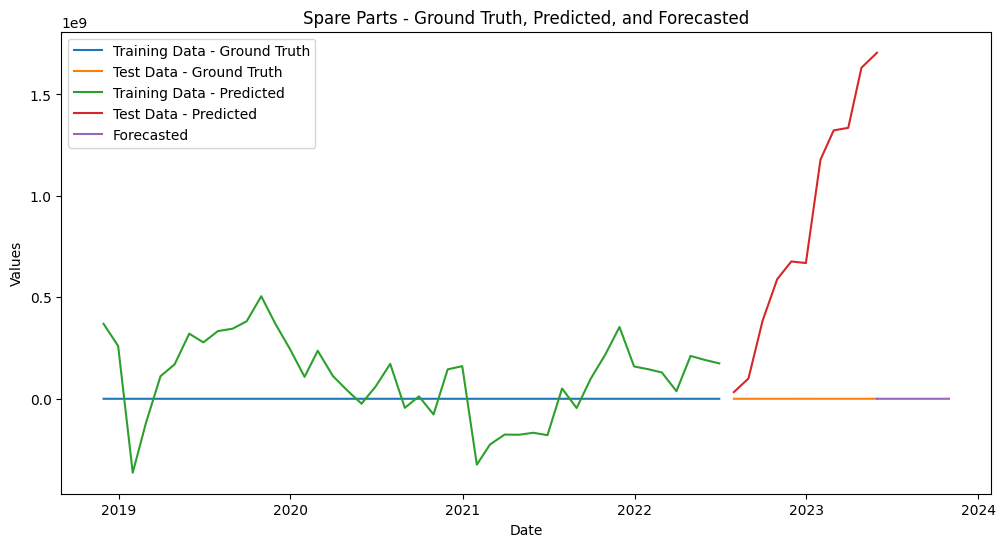

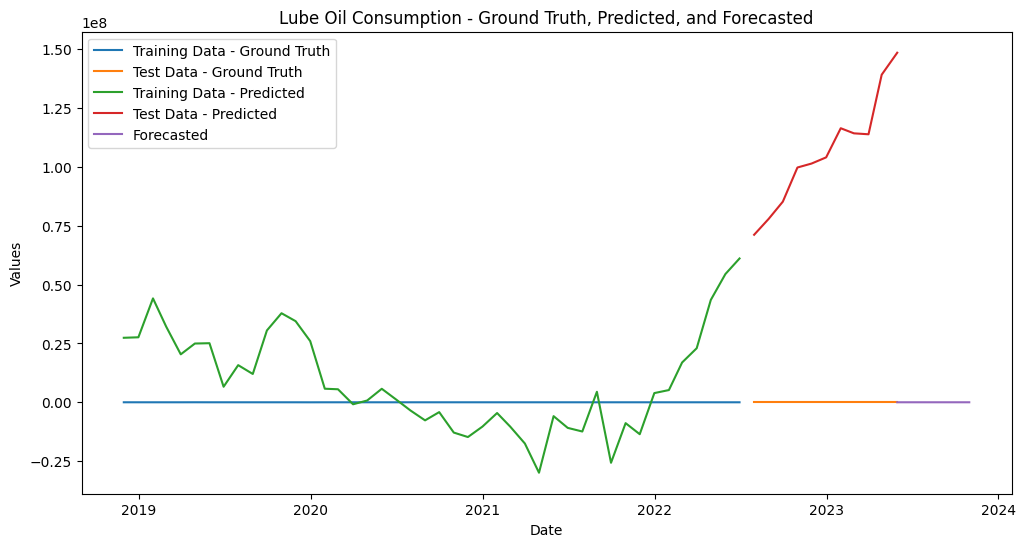

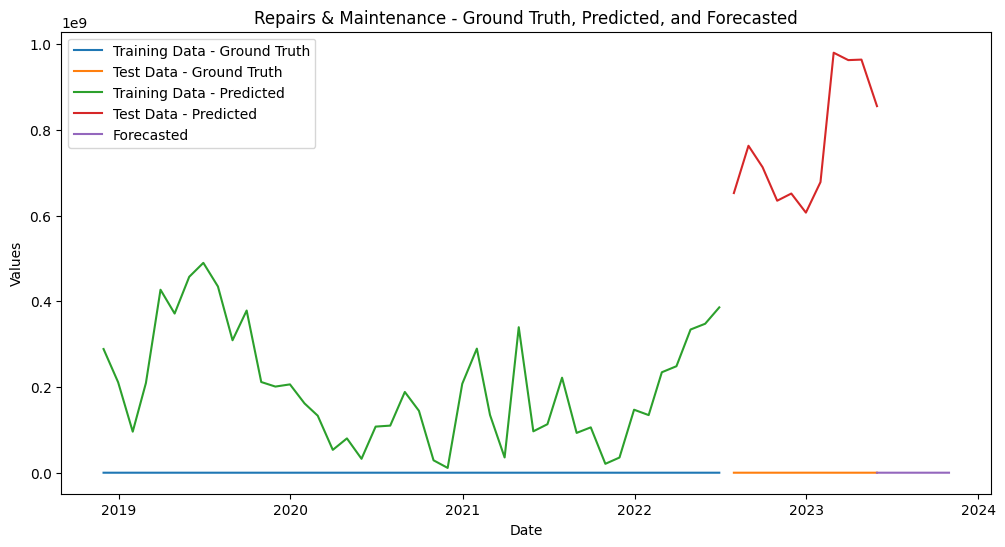

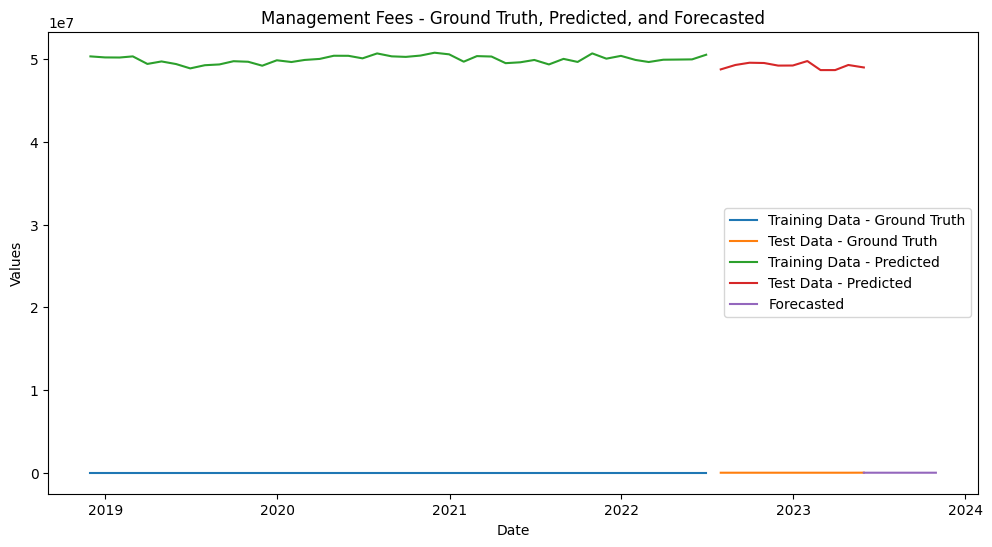

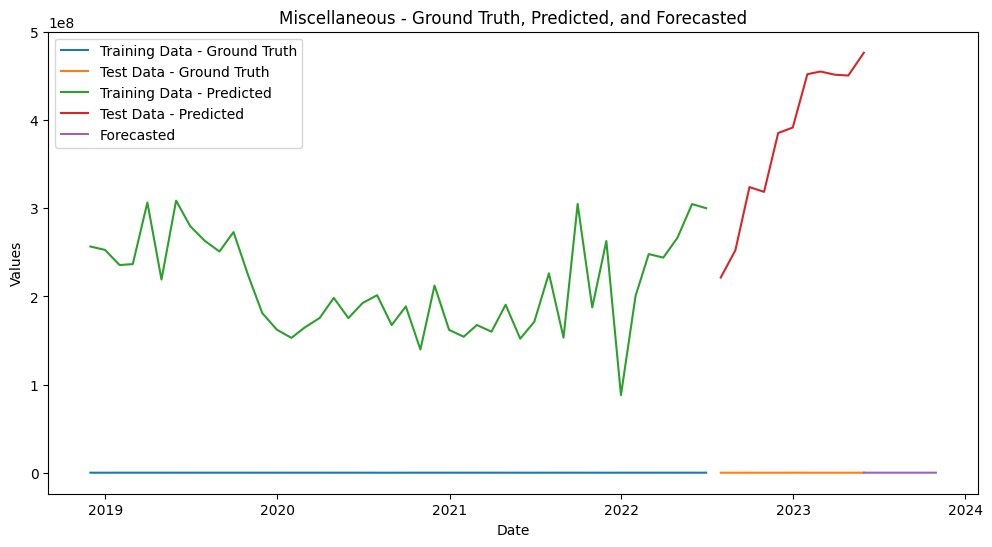

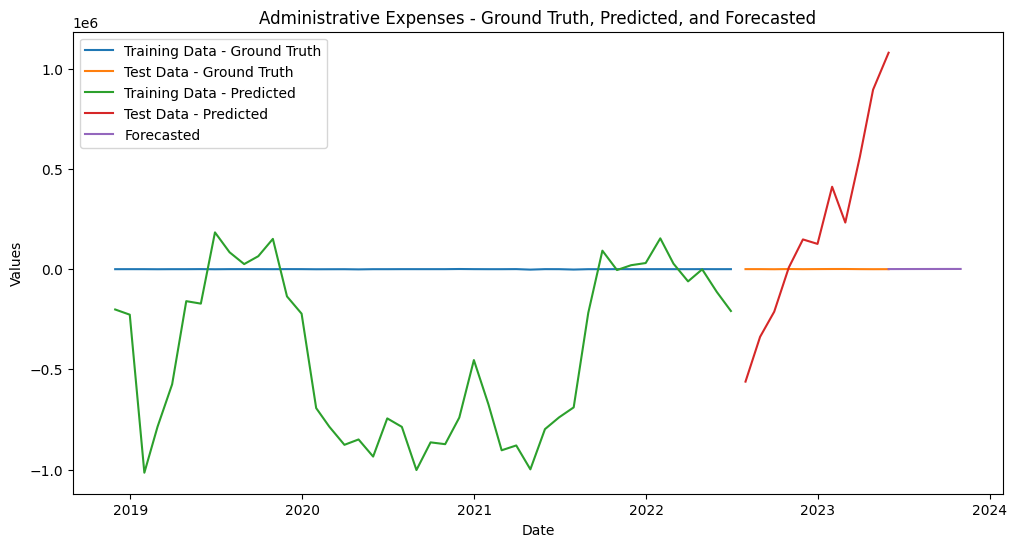

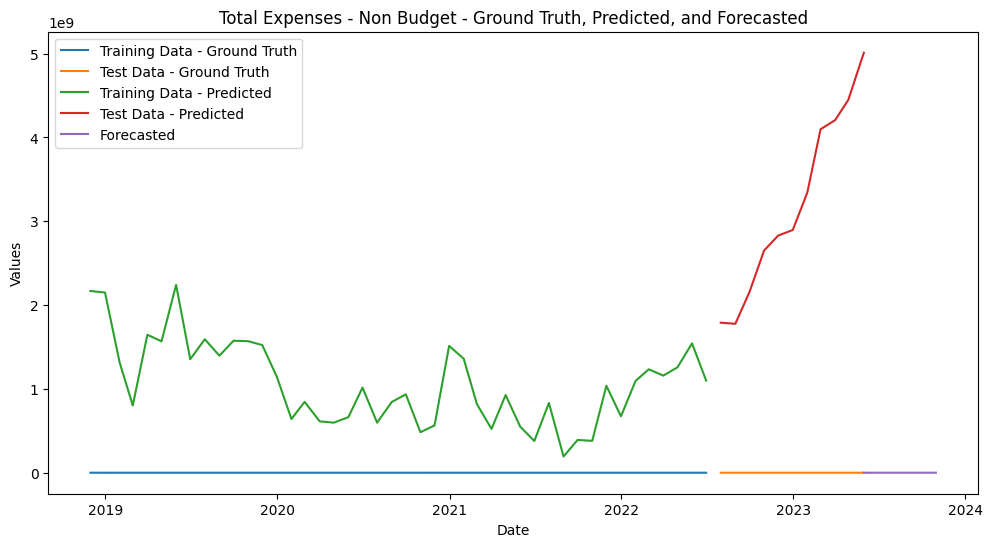

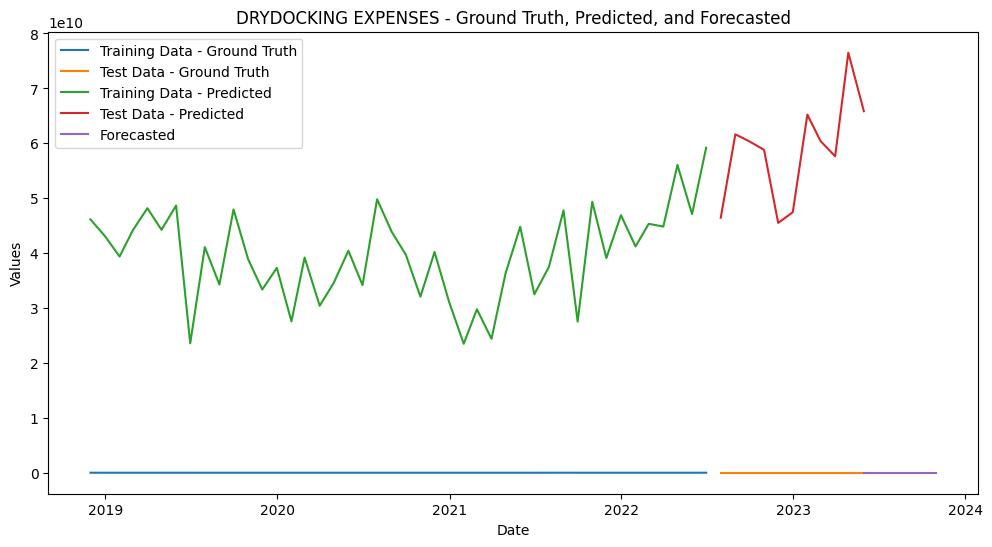

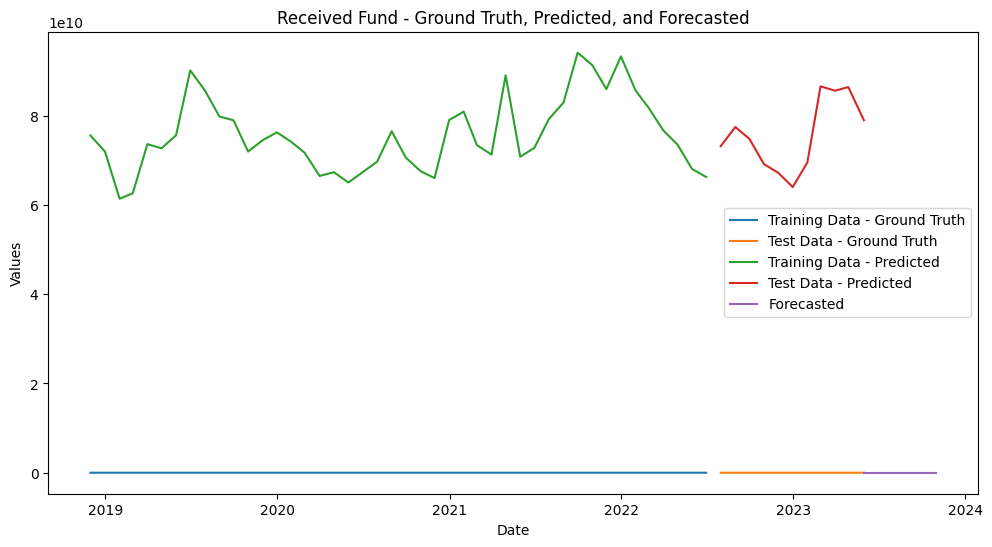

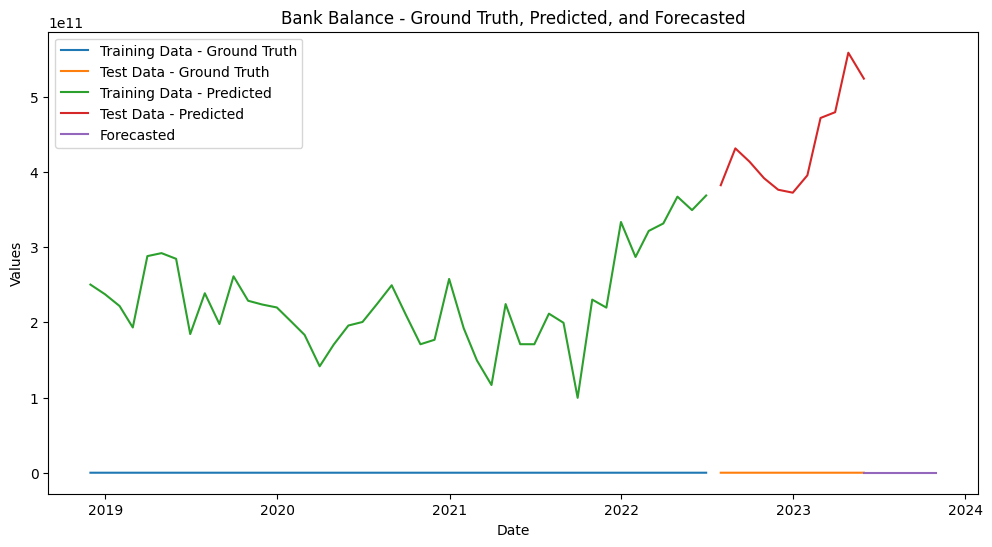

In [ ]:
# Extract the variable names
variables = ['Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Bank Balance']

# Plot the ground truth, predicted values, and forecasted values for each variable
for variable in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(dates[n_steps:train_size+n_steps], scaler.inverse_transform(y_train)[:, variables.index(variable)],
             label='Training Data - Ground Truth')
    plt.plot(dates[train_size+n_steps:], scaler.inverse_transform(y_test)[:, variables.index(variable)],
             label='Test Data - Ground Truth')
    plt.plot(dates[n_steps:train_size+n_steps], scaler.inverse_transform(y_train_pred)[:, variables.index(variable)],
             label='Training Data - Predicted')
    plt.plot(dates[train_size+n_steps:], scaler.inverse_transform(y_test_pred)[:, variables.index(variable)],
             label='Test Data - Predicted')
    plt.plot(forecast_dates, forecast_data[variable], label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'{variable} - Ground Truth, Predicted, and Forecasted')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
from prophet import Prophet

data = pd.read_excel('/content/train_v2.xlsx', engine='openpyxl')
print(data.columns)

model = Prophet()

# Define the features
features = ['date', 'Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Bank Balance']

# Select the columns for the model
model_data = data[features]

# Rename columns to "ds" and "y"
model_data = model_data.rename(columns={'date': 'ds', 'Bank Balance': 'y'})

# Add additional regressors
for feature in features[1:]:
    if feature != 'Bank Balance':
        model.add_regressor(feature)

# Fit the model to the data
model.fit(model_data)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=6, freq='M').dropna()

# Forward-fill missing values in the additional regressors
model_data = model_data.ffill()

# Add the additional regressors to the future dataframe
for feature in features[1:]:
    if feature != 'Bank Balance':
        future[feature] = model_data[feature].values[-1]

# Make predictions
forecast = model.predict(future)

# Access the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['date', 'Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses',
       'Victualling Expenses', 'Stores', 'Spare Parts', 'Lube Oil Consumption',
       'Repairs & Maintenance', 'Management Fees', 'Miscellaneous',
       'Administrative Expenses', 'Total Expenses - Non Budget',
       'DRYDOCKING EXPENSES', 'Received Fund', 'Bank Balance'],
      dtype='object')


DEBUG:cmdstanpy:input tempfile: /tmp/tmp54lg1dmr/l68w29t6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54lg1dmr/iz9b0wdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53424', 'data', 'file=/tmp/tmp54lg1dmr/l68w29t6.json', 'init=/tmp/tmp54lg1dmr/iz9b0wdx.json', 'output', 'file=/tmp/tmp54lg1dmr/prophet_modela7vknmdh/prophet_model-20230623092940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,422990.514711,225834.113102,602582.065801
1,2018-02-28,441370.977285,237201.203657,620761.853935
2,2018-03-31,539702.685199,352543.070411,717406.107255
3,2018-04-30,743197.244273,571788.243961,935888.929359
4,2018-05-31,548704.203395,351537.721444,743225.903198
...,...,...,...,...
66,2023-07-31,688858.235778,497772.809552,890762.864501
67,2023-08-31,697000.278170,508603.347071,878346.178170
68,2023-09-30,443063.921223,251313.381118,629520.787037
69,2023-10-31,758728.162828,558281.020011,964682.216068


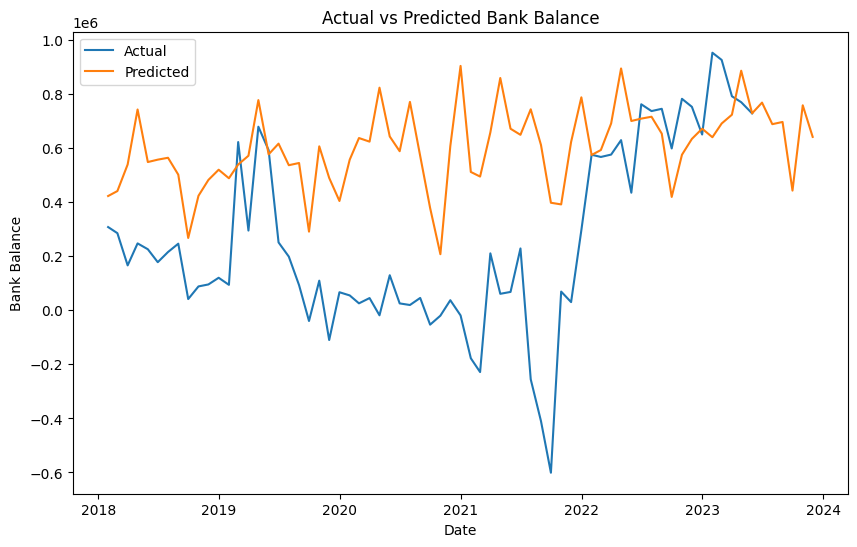

In [ ]:
def get_plot():
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(model_data['ds'], model_data['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Bank Balance')
    plt.title('Actual vs Predicted Bank Balance')
    plt.legend()
    plt.show()

In [ ]:
model_data

,ds,Fund Receipt - Budget,Crew Wages,Crew Expenses,Victualling Expenses,Stores,Spare Parts,Lube Oil Consumption,Repairs & Maintenance,Management Fees,Miscellaneous,Administrative Expenses,Total Expenses - Non Budget,DRYDOCKING EXPENSES,Received Fund,y
0,2018-01-31,113059.00,63957.78,31176.57,200.00,0.00,0.00,4497.05,0.00,10000,592.86,82.48,0.00,0.0,148968.68,308092.84
1,2018-02-28,113059.00,63391.22,10497.10,7698.35,5775.20,0.00,13059.67,0.00,10000,1767.42,45.03,6446.97,0.0,113059.00,285516.83
2,2018-03-31,113059.00,63391.22,16585.63,13447.60,8965.80,1475.00,2594.91,5658.76,10000,17964.21,93.89,10707.18,0.0,10173.45,166318.42
3,2018-04-30,113059.00,68387.49,11135.02,4899.21,11099.02,3939.56,3128.89,805.00,10000,9512.87,187.81,1283.22,0.0,113059.00,247709.13
4,2018-05-31,113059.00,67015.22,14559.76,6205.59,3439.17,993.00,6772.90,18796.00,10000,781.67,602.22,13394.40,0.0,113059.00,226034.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2023-01-31,127760.00,73635.69,32224.45,5580.00,6212.88,2740.78,0.00,19605.00,10000,12701.38,723.55,622.75,0.0,353986.24,953214.58
61,2023-02-28,127760.00,52965.79,30182.22,6490.00,11001.98,16658.69,0.00,3955.00,10000,12318.58,789.67,3543.40,0.0,127760.00,926514.85
62,2023-03-31,131381.77,88975.95,31423.10,5580.00,40079.35,21466.61,0.00,1334.00,10000,13182.95,134.66,248.64,0.0,127760.00,792025.26
63,2023-04-28,127760.00,74453.12,12425.58,5897.97,16328.71,15203.63,0.00,3521.95,10000,9110.45,-163.70,880.96,0.0,127760.00,770179.42


## univariate forecasting

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54lg1dmr/u7x89d9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54lg1dmr/dhn2cxxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67137', 'data', 'file=/tmp/tmp54lg1dmr/u7x89d9q.json', 'init=/tmp/tmp54lg1dmr/dhn2cxxc.json', 'output', 'file=/tmp/tmp54lg1dmr/prophet_model_t3sbcmn/prophet_model-20230623093543.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:35:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


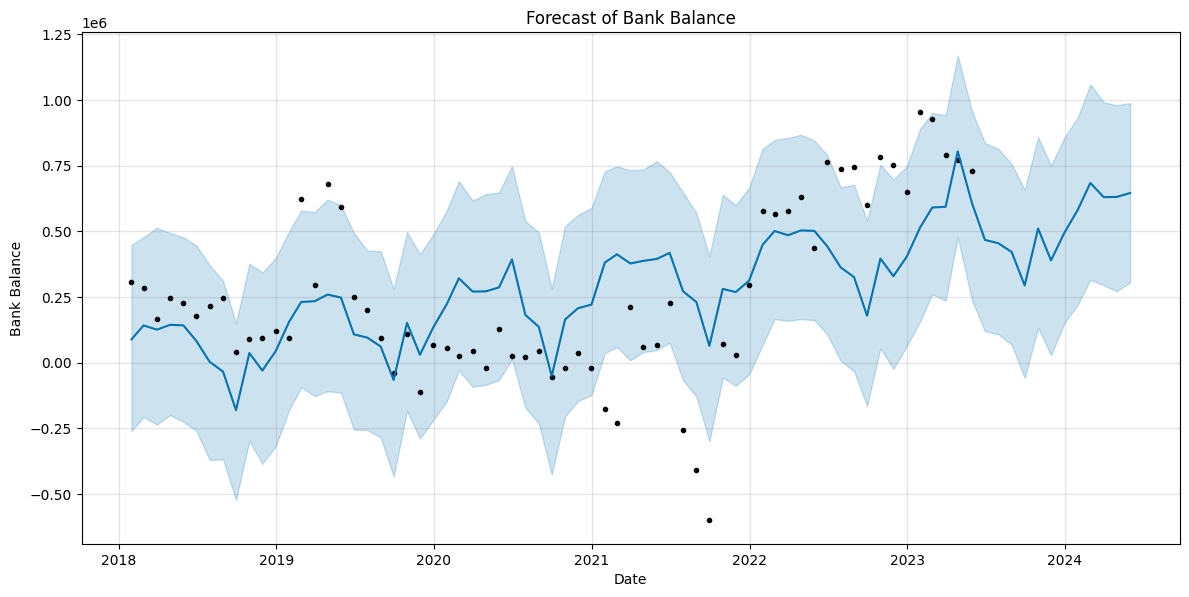

Date when bank balance goes negative: 2018-08-31 00:00:00


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load data into a DataFrame
# data = pd.read_csv('your_data_file.csv')

# Create a new Prophet model
model = Prophet()

# Prepare the data for Prophet
model_data = data[['date', 'Bank Balance']]
model_data = model_data.rename(columns={'date': 'ds', 'Bank Balance': 'y'})

# Fit the model to the data
model.fit(model_data)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = model.predict(future)

# Plot the forecasted bank balance
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
plt.xlabel('Date')
plt.ylabel('Bank Balance')
plt.title('Forecast of Bank Balance')
plt.show()

# Find the date when the bank balance goes negative
negative_balance_date = forecast[forecast['yhat'] < 0]['ds'].min()
print("Date when bank balance goes negative:", negative_balance_date)


lstm version

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_excel('/content/train_v21.xlsx', engine='openpyxl')

# Select the relevant features for analysis
features = ['date', 'Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']
data = data[features]

# Set the date column as the index
data.set_index('date', inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_excel('/content/train_v21.xlsx', engine='openpyxl')

# Select the relevant features for analysis
features = ['date', 'Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']
data = data[features]

# Set the date column as the index
data.set_index('date', inplace=True)

# Perform feature selection and time series forecasting for each feature
selected_features = []

for target_feature in features[1:]:  # Exclude the 'date' feature
    # Select the relevant features for the target variable
    relevant_features = [feature for feature in features[1:] if feature != target_feature]
    X = data[relevant_features]
    y = data[target_feature]

    # Use a feature selection method to determine the relevant features
    model = RandomForestRegressor()
    model.fit(X, y)
    importance = model.feature_importances_
    feature_importance = dict(zip(X.columns, importance))
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    selected_features.append((target_feature, sorted_features))

    # Scale the data
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
    y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

    # Reshape the data for LSTM input
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, X_train.shape[2]), ))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform the scaled values to get the actual bank balance
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred).flatten()

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    print(f"RMSE for {target_feature}: {rmse}")

    # Plot the actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Bank Balance')
    plt.title(f"Actual vs Predicted Bank Balance for {target_feature}")
    plt.legend()
    plt.show()

# Print the selected features for each target variable
for target_feature, features in selected_features:
    print(f"Selected features for {target_feature}:")
    for feature, importance in features:
        print(f"{feature}: {importance}")
    print()


1/1 [==============================] - 1s 963ms/step
RMSE for Crew Wages: 9254.755395608474


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_excel('/content/train_v21.xlsx', engine='openpyxl')

# Select the relevant features for analysis
features = ['date', 'Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']
data = data[features]

# Set the date column as the index
data.set_index('date', inplace=True)

# Perform feature selection and time series forecasting for each feature
selected_features = []

for target_feature in features[1:]:  # Exclude the 'date' feature
    # Select the relevant features for the target variable
    relevant_features = [feature for feature in features[1:] if feature != target_feature]
    X = data[relevant_features]
    y = data[target_feature]

    # Use a feature selection method to determine the relevant features
    model = RandomForestRegressor()
    model.fit(X, y)
    importance = model.feature_importances_
    feature_importance = dict(zip(X.columns, importance))
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    selected_features.append((target_feature, sorted_features))

    # Scale the data
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
    y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

    # Reshape the data for LSTM input
    window_size = 1
    X_train = np.reshape(X_train, (X_train.shape[0], window_size, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], window_size, X_test.shape[1]))

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(128, input_shape=(window_size, X_train.shape[2])))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform the scaled values to get the actual bank balance
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred).flatten()

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    print(f"RMSE for {target_feature}: {rmse}")

    # Perform forecasting for the next 3 months
    current_window = X_test[-1:]
    forecast = []

    for _ in range(3):
        next_value = model.predict(current_window)
        forecast.append(next_value[0, 0])
        current_window = np.concatenate((current_window[:, 1:, :], np.expand_dims(next_value, axis=1)), axis=1)


    # Inverse transform the forecasted values
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

    # Plot the actual, predicted, and forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.plot(np.arange(len(y_pred), len(y_pred) + len(forecast)), forecast, label='Forecast')
    plt.xlabel('Time')
    plt.ylabel('Bank Balance')
    plt.title(f"Actual, Predicted, and Forecasted Bank Balance for {target_feature}")
    plt.legend()
    plt.show()

# Print the selected features for each target variable
for target_feature, features in selected_features:
    print(f"Selected features for {target_feature}:")
    for feature, importance in features:
        print(f"{feature}: {importance}")
    print()


1/1 [==============================] - 1s 574ms/step
RMSE for Fund Receipt - Budget: 20777.33774064805
1/1 [==============================] - 0s 39ms/step


ValueError: ignored

In [ ]:
# temp = X_test[-1:].flatten().tolist()

# model.predict(np.expand_dims(np.expand_dims(temp, axis=0), axis=1))[0][0]

# np.expand_dims(next_value, axis=1), current_window[:, :, 1:]

# [:, 1:, :]

# np.concatenate((current_window[:, 1:, :], np.expand_dims(next_value, axis=1)), axis=1)


array([[-3.34938269e-01,  1.10826057e+00, -7.68050215e+00,
        -5.26641189e-01, -1.86384517e-01,  4.49705000e+03,
        -2.78986720e-01,  0.00000000e+00, -7.66907930e-01,
         2.32988023e-01, -4.86102334e-01,  0.00000000e+00,
         2.04403916e+00,  2.43052813e-01]])

In [27]:
import numpy as np
import pandas as pd
from fastapi import FastAPI
from pydantic import BaseModel
from sklearn.preprocessing import RobustScaler
from keras.models import model_from_json
from keras.layers import LSTM, Dense
import tensorflow as tf
import gradio as gr

## Variables
n_steps = 10

# Read data from CSV file
df = pd.read_excel('train_v21.xlsx', engine='openpyxl')

# Extract the features from the DataFrame
features = ['Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']

# Extract the date column (assuming the date column name is 'Date')
dates = pd.to_datetime(df['date'])

# Normalize the data using Min-Max scaling
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[features])

# Define the input data schema
class InputData(BaseModel):
    start_date: str
    end_date: str

app = FastAPI()

# Load the model architecture
with open('model_architecture.json', 'r') as f:
    model_architecture = f.read()

# Load the model weights
model = model_from_json(model_architecture)
model.load_weights('model_weights.h5')

# Load the scaler
scaler = np.load('scaler.npy', allow_pickle=True).item()

# Define the feature names
features = ['Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses',
            'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance',
            'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget',
            'DRYDOCKING EXPENSES', 'Received Fund', 'Closing Balance']

def preprocess_data(data):
    # Normalize the data using the loaded scaler
    global scaler
    scaled_data = scaler.transform(data)
    return scaled_data

def postprocess_data(data):
    # Inverse transform the scaled data
    global scaler
    return scaler.inverse_transform(data)

def generate_forecasts(start_date, end_date):

    global n_steps
    global df
    global model

    # Convert start and end date to pandas datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Calculate the number of periods
    num_periods = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1

    # Get the input data for forecasting
    input_data = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)][features]
    scaled_data = preprocess_data(input_data)

    # Generate forecasts for the given number of periods
    last_sequence = scaled_data[-n_steps:]
    forecasts = []
    for _ in range(num_periods):
        next_sequence = model.predict(np.expand_dims(last_sequence, axis=0))
        forecasts.append(next_sequence[0])
        last_sequence = np.concatenate((last_sequence[1:], next_sequence), axis=0)

    forecasts = postprocess_data(forecasts)
    forecast_dates = pd.date_range(start=start_date, periods=num_periods, freq='M')
    forecast_data = pd.DataFrame(forecasts, columns=features)
    forecast_data['date'] = forecast_dates
    forecast_data = forecast_data[['date'] + features]
    return forecast_data

@app.post("/forecast")
def forecast_values(data: InputData):
    start_date = data.start_date
    end_date = data.end_date
    forecasts = generate_forecasts(start_date, end_date)
    return forecasts.to_dict(orient='records')

def make_predictions(start_date, end_date):
    input_data = InputData(start_date=start_date, end_date=end_date)
    response = forecast_values(input_data)
    return response

input_start_date = gr.inputs.Textbox(label="Start Date")
input_end_date = gr.inputs.Textbox(label="End Date")
output_text = gr.outputs.Textbox(label="Forecasts")

iface = gr.Interface(fn=make_predictions, inputs=[input_start_date, input_end_date], outputs=output_text)

iface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://61b82170cef558d069.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from kerastuner.tuners import RandomSearch
from keras.callbacks import LearningRateScheduler, EarlyStopping
import tensorflow as tf

# Read data from CSV file
data = pd.read_excel('/content/train_v21.xlsx', engine='openpyxl')

# Extract the features from the DataFrame
features = ['Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses', 'Stores',
            'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance', 'Management Fees', 'Miscellaneous',
            'Administrative Expenses', 'Total Expenses - Non Budget', 'DRYDOCKING EXPENSES', 'Total Expense',
            'Opening Balance', 'Received Fund', 'Closing Balance', 'Expected Bank Balance', 'Service Adavnce']

# Extract the date column (assuming the date column name is 'Date')
dates = pd.to_datetime(data['date'])

data.to_csv('history.csv', index=False)

# Define the number of time steps for input sequences
n_steps = 10

# Normalize the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data[features])

# Split the data into input sequences and corresponding targets
X, y = [], []
for i in range(len(scaled_data) - n_steps):
    X.append(scaled_data[i:i+n_steps])
    y.append(scaled_data[i+n_steps])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the function to build the LSTM model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   activation='relu',
                   return_sequences=True,
                   input_shape=(n_steps, len(features))))
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32),
                       activation='relu',
                       return_sequences=True))
    model.add(LSTM(units=hp.Int('last_lstm_units', min_value=32, max_value=256, step=32),
                   activation='relu'))
    model.add(Dense(len(features)))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse')
    return model

# Define the learning rate scheduler
def lr_scheduler(epoch, learning_rate):
    if epoch % 10 == 0 and epoch > 0:
        return learning_rate * 0.1
    return learning_rate

# Define the early stopping callback
early_stopping = EarlyStopping(patience=5, monitor='val_loss')

# Define the tuner with the search space and search strategy
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(lr_scheduler), early_stopping])

# Retrieve the best model and retrain it on the full training data
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X, y, epochs=50, batch_size=32, verbose=1, callbacks=[LearningRateScheduler(lr_scheduler), early_stopping])

# Save the best model's weights
best_model.save_weights('best_model.h5')

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the scaled predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(data[features][n_steps:train_size+n_steps], y_train_pred))
test_rmse = np.sqrt(mean_squared_error(data[features][train_size+n_steps:], y_test_pred))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Generate forecasts for the next 12 months
last_sequence = scaled_data[-n_steps:]
forecasts = []
for _ in range(12):
    next_sequence = best_model.predict(np.expand_dims(last_sequence, axis=0))
    forecasts.append(next_sequence[0])
    last_sequence = np.concatenate((last_sequence[1:], next_sequence), axis=0)

# Inverse transform the forecasts
forecasts = scaler.inverse_transform(forecasts)

# Create the forecast dates
last_date = dates.iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=12, freq='M')

# Create a DataFrame with the forecasts
forecast_data = pd.DataFrame(forecasts, columns=features)
forecast_data['Date'] = forecast_dates
forecast_data = forecast_data[['Date'] + features]

# Save the forecasted DataFrame to CSV
forecast_data.to_csv('forecasted_df.csv', index=False)

print(forecast_data)


Trial 5 Complete [00h 00m 44s]
val_loss: 119619.68229166667

Best val_loss So Far: 119619.68229166667
Total elapsed time: 00h 03m 20s


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 221040.5469

2/2 [==============================] - 9s 109ms/step - loss: 221040.5469 - lr: 1.0000e-05
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 221187.0312

2/2 [==============================] - 0s 106ms/step - loss: 221187.0312 - lr: 1.0000e-05
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 222994.6250

2/2 [==============================] - 0s 95ms/step - loss: 222994.6250 - lr: 1.0000e-05
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 222816.3594

2/2 [==============================] - 0s 105ms/step - loss: 222816.3594 - lr: 1.0000e-05
Epoch 5/50
2/2 [==============================] - ETA: 0s - loss: 225188.4062

2/2 [==============================] - 0s 94ms/step - loss: 225188.4062 - lr: 1.0000e-05
Epoch 6/50
2/2 [==============================] - ETA: 0s - loss: 222647.2656

2/2 [==============================] - 0s 106ms/step - loss: 222647.2656 - lr: 1.0000e-05
Epoch 7/50
2/2 [==============================] - ETA: 0s - loss: 225363.4844

2/2 [==============================] - 0s 132ms/step - loss: 225363.4844 - lr: 1.0000e-05
Epoch 8/50
2/2 [==============================] - ETA: 0s - loss: 223557.7812

2/2 [==============================] - 0s 90ms/step - loss: 223557.7812 - lr: 1.0000e-05
Epoch 9/50
2/2 [==============================] - ETA: 0s - loss: 222726.3125

2/2 [==============================] - 0s 109ms/step - loss: 222726.3125 - lr: 1.0000e-05
Epoch 10/50
2/2 [==============================] - ETA: 0s - loss: 222824.1250

2/2 [==============================] - 0s 98ms/step - loss: 222824.1250 - lr: 1.0000e-05
Epoch 11/50
2/2 [==============================] - ETA: 0s - loss: 220223.2031

2/2 [==============================] - 0s 137ms/step - loss: 220223.2031 - lr: 1.0000e-06
Epoch 12/50
2/2 [==============================] - ETA: 0s - loss: 220158.7344

2/2 [==============================] - 0s 132ms/step - loss: 220158.7344 - lr: 1.0000e-06
Epoch 13/50
2/2 [==============================] - ETA: 0s - loss: 220003.2188

2/2 [==============================] - 0s 100ms/step - loss: 220003.2188 - lr: 1.0000e-06
Epoch 14/50
2/2 [==============================] - ETA: 0s - loss: 219800.2344

2/2 [==============================] - 0s 91ms/step - loss: 219800.2344 - lr: 1.0000e-06
Epoch 15/50
2/2 [==============================] - ETA: 0s - loss: 219943.9219

2/2 [==============================] - 0s 103ms/step - loss: 219943.9219 - lr: 1.0000e-06
Epoch 16/50
2/2 [==============================] - ETA: 0s - loss: 220096.2188

2/2 [==============================] - 0s 103ms/step - loss: 220096.2188 - lr: 1.0000e-06
Epoch 17/50
2/2 [==============================] - ETA: 0s - loss: 220106.2500

2/2 [==============================] - 0s 100ms/step - loss: 220106.2500 - lr: 1.0000e-06
Epoch 18/50
2/2 [==============================] - ETA: 0s - loss: 220076.8750

2/2 [==============================] - 0s 114ms/step - loss: 220076.8750 - lr: 1.0000e-06
Epoch 19/50
2/2 [==============================] - ETA: 0s - loss: 220078.7969

2/2 [==============================] - 0s 99ms/step - loss: 220078.7969 - lr: 1.0000e-06
Epoch 20/50
2/2 [==============================] - ETA: 0s - loss: 219926.0469

2/2 [==============================] - 0s 160ms/step - loss: 219926.0469 - lr: 1.0000e-06
Epoch 21/50
2/2 [==============================] - ETA: 0s - loss: 219891.4844

2/2 [==============================] - 0s 240ms/step - loss: 219891.4844 - lr: 1.0000e-07
Epoch 22/50
2/2 [==============================] - ETA: 0s - loss: 219883.7500

2/2 [==============================] - 0s 213ms/step - loss: 219883.7500 - lr: 1.0000e-07
Epoch 23/50
2/2 [==============================] - ETA: 0s - loss: 219874.3438

2/2 [==============================] - 0s 111ms/step - loss: 219874.3438 - lr: 1.0000e-07
Epoch 24/50
2/2 [==============================] - ETA: 0s - loss: 219863.8906

2/2 [==============================] - 0s 220ms/step - loss: 219863.8906 - lr: 1.0000e-07
Epoch 25/50
2/2 [==============================] - ETA: 0s - loss: 219852.4375

2/2 [==============================] - 0s 238ms/step - loss: 219852.4375 - lr: 1.0000e-07
Epoch 26/50
2/2 [==============================] - ETA: 0s - loss: 219839.5625

2/2 [==============================] - 0s 210ms/step - loss: 219839.5625 - lr: 1.0000e-07
Epoch 27/50
2/2 [==============================] - ETA: 0s - loss: 219826.5781

2/2 [==============================] - 0s 104ms/step - loss: 219826.5781 - lr: 1.0000e-07
Epoch 28/50
2/2 [==============================] - ETA: 0s - loss: 219813.7812

2/2 [==============================] - 0s 116ms/step - loss: 219813.7812 - lr: 1.0000e-07
Epoch 29/50
2/2 [==============================] - ETA: 0s - loss: 219796.8438

2/2 [==============================] - 0s 98ms/step - loss: 219796.8438 - lr: 1.0000e-07
Epoch 30/50
2/2 [==============================] - ETA: 0s - loss: 219767.8438

2/2 [==============================] - 0s 95ms/step - loss: 219767.8438 - lr: 1.0000e-07
Epoch 31/50
2/2 [==============================] - ETA: 0s - loss: 219755.2031

2/2 [==============================] - 0s 97ms/step - loss: 219755.2031 - lr: 1.0000e-08
Epoch 32/50
2/2 [==============================] - ETA: 0s - loss: 219753.4219

2/2 [==============================] - 0s 99ms/step - loss: 219753.4219 - lr: 1.0000e-08
Epoch 33/50
2/2 [==============================] - ETA: 0s - loss: 219752.3281

2/2 [==============================] - 0s 95ms/step - loss: 219752.3281 - lr: 1.0000e-08
Epoch 34/50
2/2 [==============================] - ETA: 0s - loss: 219750.2188

2/2 [==============================] - 0s 113ms/step - loss: 219750.2188 - lr: 1.0000e-08
Epoch 35/50
2/2 [==============================] - ETA: 0s - loss: 219748.2031

2/2 [==============================] - 0s 95ms/step - loss: 219748.2031 - lr: 1.0000e-08
Epoch 36/50
2/2 [==============================] - ETA: 0s - loss: 219746.5938

2/2 [==============================] - 0s 105ms/step - loss: 219746.5938 - lr: 1.0000e-08
Epoch 37/50
2/2 [==============================] - ETA: 0s - loss: 219743.9062

2/2 [==============================] - 0s 91ms/step - loss: 219743.9062 - lr: 1.0000e-08
Epoch 38/50
2/2 [==============================] - ETA: 0s - loss: 219741.5625

2/2 [==============================] - 0s 93ms/step - loss: 219741.5625 - lr: 1.0000e-08
Epoch 39/50
2/2 [==============================] - ETA: 0s - loss: 219739.7812

2/2 [==============================] - 0s 107ms/step - loss: 219739.7812 - lr: 1.0000e-08
Epoch 40/50
2/2 [==============================] - ETA: 0s - loss: 219737.1562

2/2 [==============================] - 0s 104ms/step - loss: 219737.1562 - lr: 1.0000e-08
Epoch 41/50
2/2 [==============================] - ETA: 0s - loss: 219734.2969

2/2 [==============================] - 0s 94ms/step - loss: 219734.2969 - lr: 1.0000e-09
Epoch 42/50
2/2 [==============================] - ETA: 0s - loss: 219734.1875

2/2 [==============================] - 0s 95ms/step - loss: 219734.1875 - lr: 1.0000e-09
Epoch 43/50
2/2 [==============================] - ETA: 0s - loss: 219734.0781

2/2 [==============================] - 0s 90ms/step - loss: 219734.0781 - lr: 1.0000e-09
Epoch 44/50
2/2 [==============================] - ETA: 0s - loss: 219733.9219

2/2 [==============================] - 0s 110ms/step - loss: 219733.9219 - lr: 1.0000e-09
Epoch 45/50
2/2 [==============================] - ETA: 0s - loss: 219733.8125

2/2 [==============================] - 0s 102ms/step - loss: 219733.8125 - lr: 1.0000e-09
Epoch 46/50
2/2 [==============================] - ETA: 0s - loss: 219733.7344

2/2 [==============================] - 0s 97ms/step - loss: 219733.7344 - lr: 1.0000e-09
Epoch 47/50
2/2 [==============================] - ETA: 0s - loss: 219733.5938

2/2 [==============================] - 0s 99ms/step - loss: 219733.5938 - lr: 1.0000e-09
Epoch 48/50
2/2 [==============================] - ETA: 0s - loss: 219733.4531

2/2 [==============================] - 0s 91ms/step - loss: 219733.4531 - lr: 1.0000e-09
Epoch 49/50
2/2 [==============================] - ETA: 0s - loss: 219733.3125

2/2 [==============================] - 0s 113ms/step - loss: 219733.3125 - lr: 1.0000e-09
Epoch 50/50
2/2 [==============================] - ETA: 0s - loss: 219733.2344

1/1 [==============================] - 0s 29ms/step
Train RMSE: 13309088.61027711
Test RMSE: 286344.6528084166
1/1 [==============================] - 0s 25ms/step
         Date  Fund Receipt - Budget    Crew Wages  Crew Expenses  \
0  2023-05-31          108749.997632  65192.410273   13525.251458   
1  2023-06-30          104074.043972  65557.077664   13571.528001   
2  2023-07-31          101219.574448  64332.709081   19163.079286   
3  2023-08-31          104783.580147  64876.899035   24100.558122   
4  2023-09-30          113342.928718  67253.289360   28983.088029   
5  2023-10-31          175845.919495  72913.487551  -19977.561537   
6  2023-11-30          282142.961731  61497.490595   94862.791064   
7  2023-12-31          186619.039246  70398.685445  263246.117306   
8  2024-01-31          378898.883911  53209.371842  170816.764681   
9  2024-02-29          380284.770477  94428.441420  327987.085682   
10 2024-03-31          110192.001047  65292.120024   15035.594596   
11 2024-0

In [10]:
print('date	Fund Receipt - Budget	Crew Wages	Crew Expenses	Victualling Expenses	Stores	Spare Parts	Lube Oil Consumption	Repairs & Maintenance	Management Fees	Miscellaneous	Administrative Expenses	Total Expenses - Non Budget	DRYDOCKING EXPENSES	Total Expense	Opening Balance	Received Fund	Closing Balance	Expected Bank Balance	Service Adavnce'.replace('\t', '\n').splitlines())

['date', 'Fund Receipt - Budget', 'Crew Wages', 'Crew Expenses', 'Victualling Expenses', 'Stores', 'Spare Parts', 'Lube Oil Consumption', 'Repairs & Maintenance', 'Management Fees', 'Miscellaneous', 'Administrative Expenses', 'Total Expenses - Non Budget', 'DRYDOCKING EXPENSES', 'Total Expense', 'Opening Balance', 'Received Fund', 'Closing Balance', 'Expected Bank Balance', 'Service Adavnce']
